# Solving Linear Systems: 2 Variable

## By Completing this lab, I will be able to use python and numpy packages to solve system of linear equations.
* Using Numpy linear algebra package to find the solutions of the system of linear equations
* Find the solution for the system of linear equations using elimination method. 
* Evaluate the determinant of the matrix and examine the relationship between matrix singularly and number of solution of the linear system.

In [5]:
# Importing Libraries
import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import datetime
print(f"Last Updated:{datetime.datetime.now()}")

Last Updated:2026-02-02 22:42:34.966309


## Representing And Solving of linear Equations using Matrices

### System of Linear Equations 

A **system of linear equations** or **linear system** is a collection of one or more linear equations involving the same variable. For example: 
$$
\begin{cases}
-x_1 + 3x_2 = 7, \\
3x_1 + 2x_2 = 1
\end{cases}
$$
This is a system of two equations with two unknown variable **x_1,x_2**.To Solve a system of linear equations means to find such values of the variables **x_1,x_2** , that all of its equations are simultaneously satisfied.

A linear system is **inconsistent** if its has no solution and otherwise it is said to be **consistent**.
Consistent system can have one or infinite number of solutions.

### Solving system of linear equations using Matrices

In [6]:
# In order to perform the calc we need to input seperately both co-effeciant and value(array).
# A stands for co-efficiant and b stands for value, x stands for answer
A = np.array([[-1,3],
              [3,2]],dtype=int)
b = np.array([7,1],dtype=int)
x = np.linalg.solve(A,b)
print(f"Answer is: {x}")

Answer is: [-1.  2.]


In [7]:
x.shape,A.shape,b.shape

((2,), (2, 2), (2,))

In [8]:
# Check if the number is correct 
x1,x2 = x
check1 = -1*x1 + 3*x2
check2 = 3*x1 + 2*x2
print(f"First Equation answer: {check1}")
print(f"Second Equation answer: {check2}")

First Equation answer: 7.0
Second Equation answer: 1.0


In [9]:
# Automatic Check by Computer
x1, x2 = x 
if np.allclose(np.dot(A,x),b): 
    print("Correct")
else:  # np.allclose() returns true if two arrays are element-wise equal within acceptable tolerance.
    print("Incorrect")

Correct


### Evaluating Determinant of a Matrix

In [10]:
# Determinant is a number of that matrix which defines that the function has solution or not.
# if np.linalg.det(A) == 0 means it has no/infinite solution.
# if np.linalg.det(A) is (not=0) means it has solution. 

In [11]:
d = np.linalg.det(A)
print(f"Determinant of Matrix A is: {d:.2f}") # 2f stands for show 2 decimal number after point(.)

Determinant of Matrix A is: -11.00


## Solving System of Linear Equations using Elimination Method. 

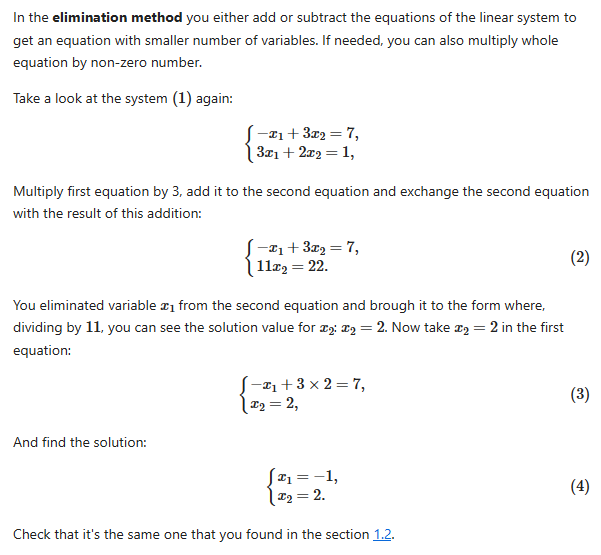


### Preperation for the Implemetation of Elimination Method in the Code.

#### For Elimination method we need a matrix to work on ,we have our co-efficiant which is a matrix and we have also the result as a vector, combining these two A and b will produce an Augumented Matrix , that what we need.


In [12]:
A,b

(array([[-1,  3],
        [ 3,  2]]),
 array([7, 1]))

In [13]:
b.shape,A.shape # For glueing together shape must be the same number of axis, also it will allign both Coefficient and values

((2,), (2, 2))

In [14]:
b = b.reshape(2,1)

In [15]:
# Augemented Matrix using hstack()
aug_mat = np.hstack((A,b))
aug_mat

array([[-1,  3,  7],
       [ 3,  2,  1]])

In [16]:
aug_mat[0] , aug_mat[1]

(array([-1,  3,  7]), array([3, 2, 1]))

In [17]:
## Implementation of Elimination Method
# In order to implement we need to keep our main aug_mat fresh.

# .copy() is used to keep the original matrix without any changes.
aug_mat_new = aug_mat.copy()

# Multiplying First Row by 3 
aug_mat_new[1] = 3 * aug_mat_new[0] + aug_mat_new[1]
aug_mat_new[1] = aug_mat_new[1] / 11
aug_mat_new

array([[-1,  3,  7],
       [ 0,  1,  2]])

#### We can see on aug_mat_new[1] : 0x1 + 1x2 = 2 , that means x2 = 2 , now we can just implement x2 on any array to get the x1

In [18]:
x2 = aug_mat_new[1,2]
# We need to multiply by -1 
x1 = (7 - 3 * x2) / (-1)

In [19]:
print(f"Answer of x1 and x2 is {x1},{x2}")

Answer of x1 and x2 is -1.0,2


### Graphical Representation of the Solution

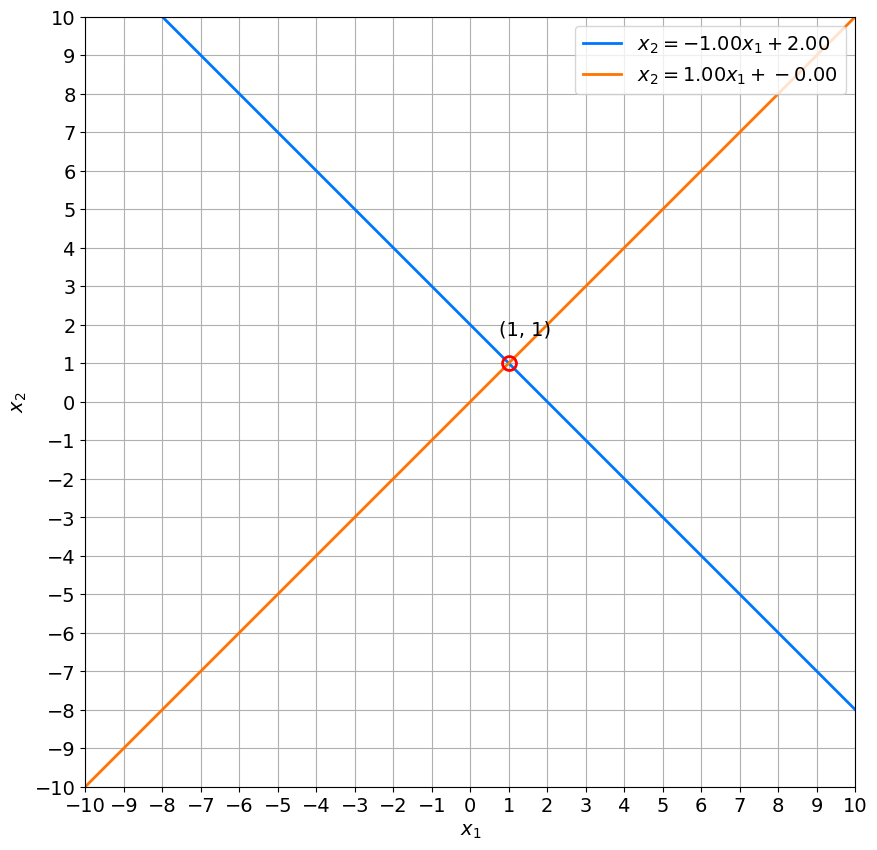

In [24]:
def plot_lines(M):
    # 1. Create the x-range
    x_1 = np.linspace(-10, 10, 100)
    
    # 2. Calculate the line values based on the augmented matrix M
    # Equation: M[0,0]*x1 + M[0,1]*x2 = M[0,2] -> x2 = (M[0,2] - M[0,0]*x1) / M[0,1]
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]

    _, ax = plt.subplots(figsize=(10, 10))
    
    # Plotting line 1
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
            label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    
    # Plotting line 2
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
            label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    # 3. Extracting A and b to solve the system Ax = b
    A = M[:, 0:-1]
    b = M[:, -1:].flatten()
    d = np.linalg.det(A)

    # 4. If the determinant is not zero, find and plot the intersection
    if d != 0:
        solution = np.linalg.solve(A, b)
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
                markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, 
                f'({solution[0]:.0f}, {solution[1]:.0f})', fontsize=14)

    # Formatting the plot
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 11))
    ax.set_yticks(np.arange(-10, 11))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

# --- HOW TO RUN IT ---
# Define a 2x3 matrix representing two linear equations
# Example: 1x + 1y = 2 and 1x - 1y = 0
example_matrix = np.array([
    [1, 1, 2],
    [1, -1, 0]
])

plot_lines(example_matrix)

### Systems of Linear Equation with no solution

 #### Given another system of linear equations:
$$
\begin{cases}
-x_1 + 3x_2 = 7,\\ 
3x_1 - 9x_2 = 1
\end{cases}
$$

In [32]:
# Lets Find out the determinant of the corresponding matrix,
A_1 = np.array([[-1,3],
                [3,-9]],dtype = int)
b_1 = np.array([7,1],dtype = int)
det_A_1 = np.linalg.det(A_1)
print(f"Determinant of A_1 is:{det_A_1}")

Determinant of A_1 is:0.0


In [ ]:
#